In [8]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers, models
import numpy as np
import matplotlib.pyplot as plt

In [9]:
mnist = keras.datasets.mnist
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

In [10]:
train_images = tf.reshape(train_images, [-1,28,28,1])
test_images = tf.reshape(test_images, [-1,28,28,1])

In [11]:
def select_model(model_number):
    if model_number==1:
        model = keras.models.Sequential([
            keras.layers.Conv2D(32,(3,3),activation='relu', input_shape = (28,28,1)),
            keras.layers.MaxPool2D((2,2)),
            keras.layers.Flatten(),
            keras.layers.Dense(10,activation= 'softmax')])
    if model_number == 2:
        model = keras.models.Sequential([
            keras.layers.Conv2D(32,(3,3),activation='relu', input_shape = (28,28,1)),
            keras.layers.MaxPool2D((2,2)),
            keras.layers.Conv2D(64,(3,3),activation='relu'),
            keras.layers.MaxPool2D((2,2)),
            keras.layers.Flatten(),
            keras.layers.Dense(10,activation= 'softmax')])
    if model_number == 3:
        model = keras.models.Sequential([
            keras.layers.Conv2D(32,(3,3),activation='relu', input_shape = (28,28,1)),
            keras.layers.MaxPool2D((2,2)),
            keras.layers.Conv2D(64,(3,3),activation='relu'),
            keras.layers.Conv2D(64,(3,3),activation='relu'),
            keras.layers.MaxPool2D((2,2)),
            keras.layers.Conv2D(128,(3,3),activation='relu'),
            keras.layers.MaxPool2D((2,2)),
            keras.layers.Flatten(),
            keras.layers.Dense(10,activation= 'softmax')])
    return model

In [12]:
model = select_model(1)

In [13]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 13, 13, 32)       0         
 )                                                               
                                                                 
 flatten (Flatten)           (None, 5408)              0         
                                                                 
 dense (Dense)               (None, 10)                54090     
                                                                 
Total params: 54,410
Trainable params: 54,410
Non-trainable params: 0
_________________________________________________________________


In [14]:
model.compile(
    optimizer= 'adam',
    loss = 'sparse_categorical_crossentropy',
    metrics = ['accuracy']
)

In [15]:
model.fit(train_images,train_labels, epochs = 5)

Epoch 1/5
1875/1875 [==============================] - 6s 3ms/step - loss: 0.6436 - accuracy: 0.9395
Epoch 2/5
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0858 - accuracy: 0.9743
Epoch 3/5
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0674 - accuracy: 0.9793
Epoch 4/5
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0595 - accuracy: 0.9818
Epoch 5/5
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0507 - accuracy: 0.9844


In [16]:
test_loss, accuracy = model.evaluate(test_images, test_labels, verbose = 2)
print('\nTest loss : ',test_loss)
print('Test accuracy : ',accuracy)

313/313 - 0s - loss: 0.1177 - accuracy: 0.9746 - 479ms/epoch - 2ms/step

Test loss :  0.117733895778656
Test accuracy :  0.9746000170707703


In [17]:
test_images = tf.cast(test_images, tf.float32)
pred = model.predict(test_images)
Number = [0,1,2,3,4,5,6,7,8,9]

313/313 [==============================] - 0s 1ms/step


In [18]:
print('Prediction : ',pred.shape)
print('Test labels : ',test_labels.shape)

Prediction :  (10000, 10)
Test labels :  (10000,)


In [19]:
def plot_image(i, predictions_array, true_label, img):
  predictions_array, true_label, img = predictions_array[i], true_label[i], img[i]
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])

  plt.imshow(img, cmap=plt.cm.binary)

  predicted_label = np.argmax(predictions_array)
  if predicted_label == true_label:
    color = 'blue'
  else:
    color = 'red'

  plt.xlabel("{} {:2.0f}% ({})".format(Number[predicted_label],
                                100*np.max(predictions_array),
                                Number[true_label]),
                                color=color)

def plot_value_array(i, predictions_array, true_label):
  predictions_array, true_label = predictions_array[i], true_label[i]
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])
  thisplot = plt.bar(range(10), predictions_array, color="#777777")
  plt.ylim([0, 1])
  predicted_label = np.argmax(predictions_array)
  plt.xticks(Number)

  thisplot[predicted_label].set_color('red')
  thisplot[true_label].set_color('blue')

In [20]:
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

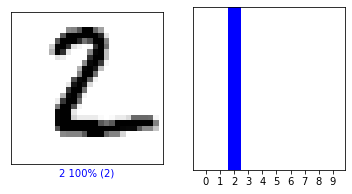

In [21]:
i = 1
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, pred, test_labels, test_images)
plt.subplot(1,2,2)
plot_value_array(i, pred,  test_labels)
plt.show()


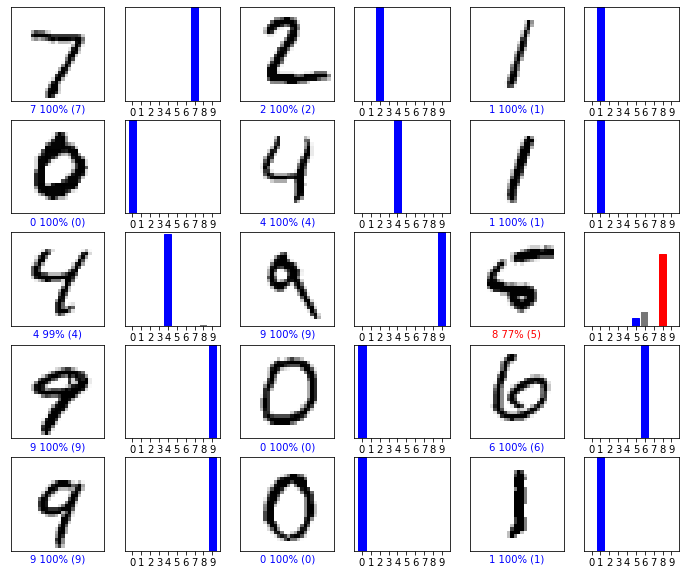

In [22]:
num_rows = 5
num_cols = 3
num_images = num_rows*num_cols
plt.figure(figsize=(2*2*num_cols, 2*num_rows))
for i in range(num_images):
  plt.subplot(num_rows, 2*num_cols, 2*i+1)
  plot_image(i, pred, test_labels, test_images)
  plt.subplot(num_rows, 2*num_cols, 2*i+2)
  plot_value_array(i, pred, test_labels)
plt.show()

In [23]:
def error_mnist(prediction_array, true_label):
    error_index = []
    
    for i in range(true_label.shape[0]):
        if np.argmax(prediction_array[i]) != true_label[i]:
            error_index.append(i)
    return error_index

# change num_cols, num_rows if you want to see more result.  
def plot_error(index, prediction_array, true_label):
    num_cols = 5
    num_rows = 5
    plt.figure(figsize=(2*2*num_cols, 2*num_rows))

    assert len(index) < num_cols * num_rows
    for i in range(len(index)):
        plt.subplot(num_rows, 2*num_cols, 2*i+1)
        idx = index[i]
        plt.imshow(test_images[idx])
        plt.subplot(num_rows, 2*num_cols, 2*i+2)
        plt.bar(range(10), prediction_array[idx])
        plt.xticks(Number)

In [24]:
index = error_mnist(pred, test_labels)
index_slice = index[:10]
print(index[:10])

[8, 18, 151, 247, 259, 282, 321, 333, 381, 417]


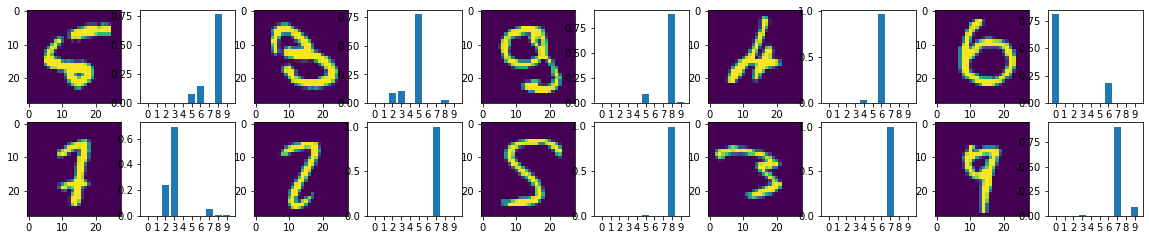

In [25]:
plot_error(index_slice, pred, test_labels)

In [ ]:
Done